<a href="https://colab.research.google.com/github/hwangsaeyeon/dacon/blob/main/AutoML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=31b54f47968055c5bb7cee695dd6db9847f7b0e61a6f9183aea03bf6da15ae04
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 5.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 7.6 MB/s 
     |████████████████████████████████| 636 kB 49.2 MB/s 
     |████████████████████████████████| 88 kB 8.5 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 134 kB 72.3 MB/s 
     |████████████████████████████████| 17.0 MB 167 kB/s 
     |████████████████████████████████| 262 kB 52.1 MB/s 
     |████████████████████████████████| 167 kB 46.7 MB/s 
     |████████████████████████████████| 56 kB 861 kB/s 
     |████████████████████████████████| 10.4 MB 45.3 MB/s 
     |████████████████████████████████| 2.0 MB 46.0 MB/s 
     |████████████████████████████████| 1.3 MB 39.7 MB/s 
     |████████████████████████████████| 1.7 MB 45.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel 

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 



#데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv("/content/drive/MyDrive/mood/train.csv",index_col=0)
test = pd.read_csv("/content/drive/MyDrive/mood/test.csv",index_col=0)
submission = pd.read_csv("/content/drive/MyDrive/mood/sample_submission.csv",index_col=0)

# Question

In [ ]:
Q = []

for i in range(1, 27):
    Q.append('Q'+str(i))

In [ ]:
train['Match_score'] = train[Q].sum(axis = 1)
train.iloc[:20]

test['Match_score'] = test[Q].sum(axis=1)
test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,Match_score
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,5.0,4.0,5.0,2.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,CHL,9,114,243,2.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,1.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,2.0,3,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0,109.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,4.0,5.0,USA,18,107,206,1.0,4.0,3.0,5.0,4.0,5.0,3.0,3.0,3.0,1.0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,2.0,2,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0,112.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,1.0,5.0,5.0,4.0,4.0,3.0,4.0,5.0,2.0,3.0,5.0,4.0,5.0,5.0,1.0,5.0,IDN,4,87,191,3.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,2.0,1.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1.0,3,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0,109.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,3.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,AUS,2409,155,258,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,1.0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,2.0,2,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0,98.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,2.0,3.0,5.0,5.0,3.0,3.0,PHL,24,163,289,3.0,3.0,3.0,5.0,5.0,4.0,3.0,4.0,3.0,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2.0,3,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,5.0,4.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,USA,10,200,254,3.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,3.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2.0,3,2.0,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0,108.0
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,4.0,4.0,3.0,5.0,GBR,504,136,155,3.0,3.0,5.0,5.0,3.0,5.0,5.0,3.0,1.0,2.0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,1,1,2.0,2,3.0,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0,115.0
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,1.0,5.0,5.0,4.0,5.0,USA,27,121,191,1.0,5.0,4.0,3.0,4.0,3.0,3.0,5.0,2.0,1.0,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,3.0,3,1.0,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0,119.0


# VCL

In [ ]:
def score_vocab(df):
    '''Adds up correct answers on real words.'''
    
    df['Vocab_Score'] = (df['VCL1'] + df['VCL2'] + df['VCL3'] + df['VCL4'] + df['VCL5'] + df['VCL7']
                         + df['VCL8'] + df['VCL10'] + df['VCL11'] + df['VCL13'] + df['VCL14']
                         + df['VCL15'] + df['VCL16'] )
  
    
    return df

In [ ]:
train = score_vocab(train)

In [ ]:
test = score_vocab(test)

# TIPI

In [ ]:
train['conscientiousness'] = ((train['TIPI3']+(6-train['TIPI8']))/2)
train['affinity'] = ((train['TIPI7']+(6-train['TIPI2']))/2)
train['stability'] = ((train['TIPI9']+(6-train['TIPI4']))/2)
train['openness'] = ((train['TIPI5']+(6-train['TIPI10']))/2)
train['extroversion'] = ((train['TIPI1']+(6-train['TIPI6']))/2)

In [ ]:
test['conscientiousness'] = ((test['TIPI3']+(6-test['TIPI8']))/2)
test['affinity'] = ((test['TIPI7']+(6-test['TIPI2']))/2)
test['stability'] = ((test['TIPI9']+(6-test['TIPI4']))/2)
test['openness'] = ((test['TIPI5']+(6-test['TIPI10']))/2)
test['extroversion'] = ((test['TIPI1']+(6-test['TIPI6']))/2)

# Country

In [ ]:
country_map = {}

for i, c in enumerate(train['country'].unique()):
    country_map[c] = i

In [ ]:
train['country'] = train['country'].map(country_map)

In [ ]:
test['country'] = test['country'].map(country_map)

#질문 빈도 계산(1,5번 대답 비율)

In [ ]:
question = train.columns[0:26]

five= []
one = []
for i in train.index:
  val1 = 0
  val5 = 0 
  for j in question:
    if train[j][i] == 1:
      val1+=1
    elif train[j][i] == 5:
      val5+=1 
  one.append(val1/26)
  five.append(val5/26)

In [ ]:
train.loc[:,'val1']=one
train.loc[:,'val5']=five
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Match_score,Vocab_Score,conscientiousness,affinity,stability,openness,extroversion,val1,val5
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,0,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1,95.0,8,4.0,4.0,5.0,3.0,2.5,0.307692,0.615385
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,0,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,85.0,11,4.0,4.5,1.5,3.5,4.0,0.192308,0.192308
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,1,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1,96.0,11,2.5,3.5,5.0,4.5,1.0,0.076923,0.423077
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,0,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1,91.0,9,2.5,3.5,2.5,4.0,3.0,0.000000,0.115385
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,2,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0,90.0,8,3.0,3.0,2.5,4.0,2.5,0.038462,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,0,12,103,161,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,2.0,2,2.0,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0,87.0,10,3.5,3.5,3.0,3.0,1.5,0.076923,0.115385
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,0,31,106,179,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,4.0,1,2.0,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1,105.0,8,4.5,4.0,1.5,4.0,3.0,0.076923,0.384615
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,0,17,103,168,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1,120.0,9,2.5,3.0,1.0,3.0,1.0,0.000000,0.730769


In [ ]:
five= []
one = []
for i in test.index:
  val1 = 0
  val5 = 0 
  for j in question:
    if test[j][i] == 1:
      val1+=1
    elif test[j][i] == 5:
      val5+=1 
  one.append(val1/26)
  five.append(val5/26)

In [ ]:
test.loc[:,'val1']=one
test.loc[:,'val5']=five

#이상치 처리

In [ ]:
for i in train.index:
  if train['introelapse'][i] >= train['introelapse'].median():
    train.loc[i,'intro_time'] = 1
  else:
    train.loc[i,'intro_time'] = 0 

  if train['testelapse'][i] >= train['testelapse'].median():
    train.loc[i,'test_time'] = 1
  else:
    train.loc[i,'test_time']=0


  if train['surveyelapse'][i] >= train['surveyelapse'].median():
    train.loc[i,'survey_time'] = 1
  else:
    train.loc[i,'survey_time'] = 0 

  if train['age'][i] >= train['age'].median():
    train.loc[i,'age_old'] = 1
  else:
    train.loc[i,'age_old'] = 0 

  if train['familysize'][i] >= train['familysize'].median():
    train.loc[i, 'familysize_big'] = 1
  else:
    train.loc[i, 'familysize_big'] = 0 

In [ ]:
for i in test.index:
  if test['introelapse'][i] >= train['introelapse'].median():
    test.loc[i,'intro_time'] = 1
  else:
    test.loc[i,'intro_time'] = 0 

  if test['testelapse'][i] >= train['testelapse'].median():
    test.loc[i,'test_time'] = 1
  else:
    test.loc[i,'test_time']=0


  if test['surveyelapse'][i] >= train['surveyelapse'].median():
    test.loc[i,'survey_time'] = 1
  else:
    test.loc[i,'survey_time'] = 0 

  if test['age'][i] >= train['age'].median():
    test.loc[i,'age_old'] = 1
  else:
    test.loc[i,'age_old'] = 0 

  if test['familysize'][i] >= train['familysize'].median():
    test.loc[i, 'familysize_big'] = 1
  else:
    test.loc[i, 'familysize_big'] = 0 

#피쳐 선택

In [ ]:
train = train.drop(columns=['country', 'introelapse','testelapse','surveyelapse', 'age', 'familysize', 
                            'VCL1', 'VCL2','VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
                            'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16',])

In [ ]:
test = test.drop(columns=['country', 'introelapse','testelapse','surveyelapse', 'age', 'familysize', 
                            'VCL1', 'VCL2','VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
                            'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16',])

In [ ]:
if len(train.columns)-1 == len(test.columns):
  print('ready')

ready


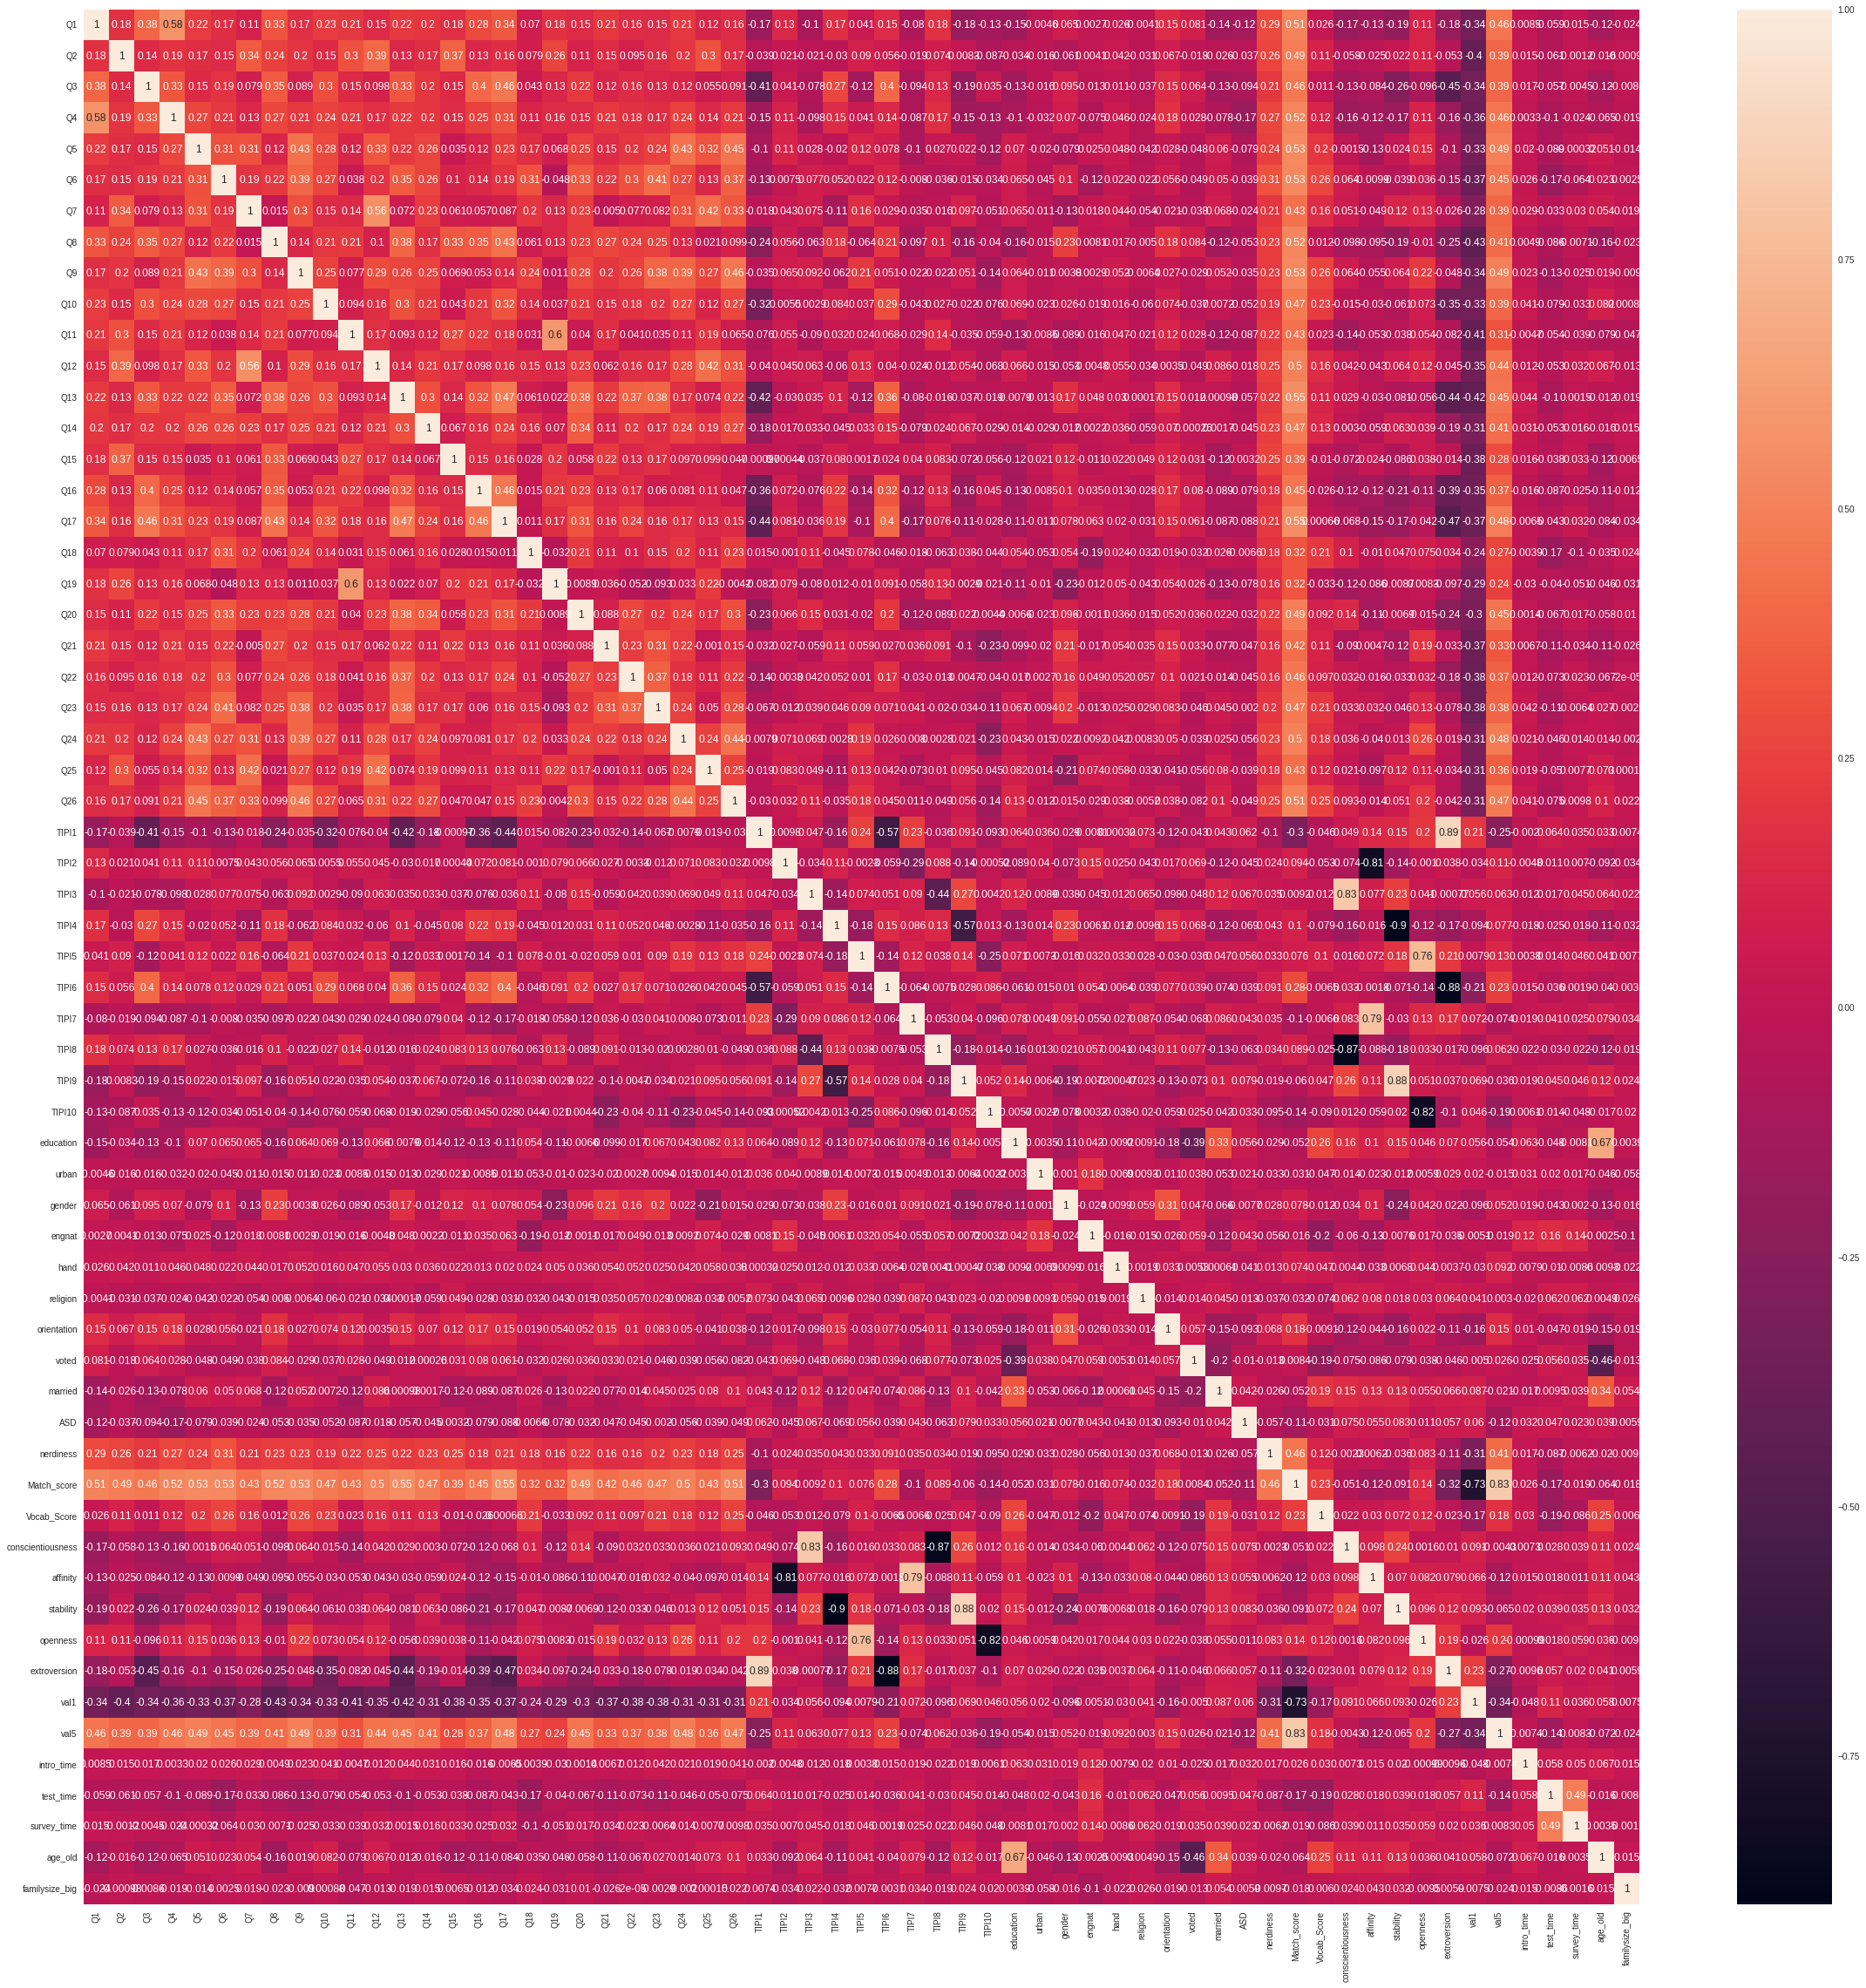

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,40))
sns.heatmap(train.loc[:,train.columns].corr(),
            annot=True
            )
plt.show()

# AutoML

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(data = train,
            target = 'nerdiness',
            imputation_type='iterative',
            categorical_iterative_imputer='lightgbm')

,Description,Value
0,session_id,6086
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 61)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,52
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='nerdiness',
                                      time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   classifier=LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_byt...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough

In [ ]:
best_models = compare_models(sort='AUC', n_select=3, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7546,0.8450,0.8165,0.7589,0.7866,0.4989,0.5008,2.152
rf,Random Forest Classifier,0.7587,0.8427,0.8214,0.7618,0.7904,0.5071,0.5092,1.912
catboost,CatBoost Classifier,0.7526,0.8229,0.8236,0.7531,0.7867,0.4937,0.4966,7.048
lightgbm,Light Gradient Boosting Machine,0.7470,0.8145,0.8128,0.7511,0.7807,0.4829,0.4851,0.540
gbc,Gradient Boosting Classifier,0.7327,0.8005,0.8090,0.7352,0.7703,0.4525,0.4555,4.476
lda,Linear Discriminant Analysis,0.7241,0.7943,0.7859,0.7346,0.7594,0.4368,0.4383,0.532
lr,Logistic Regression,0.7234,0.7940,0.7799,0.7365,0.7575,0.4362,0.4373,2.558
ada,Ada Boost Classifier,0.7184,0.7867,0.7916,0.7253,0.7569,0.4237,0.4260,1.102
nb,Naive Bayes,0.6931,0.7546,0.7832,0.6992,0.7387,0.3698,0.3734,0.082
knn,K Neighbors Classifier,0.6897,0.7423,0.7454,0.7093,0.7268,0.3682,0.3688,5.330


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6086, verbose=0,
                     warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
 

In [ ]:
blender = blend_models(estimator_list = best_models, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7662,0.8443,0.8428,0.7611,0.7998,0.5205,0.5245
1,0.7552,0.8405,0.8186,0.7586,0.7874,0.5000,0.5020
2,0.7729,0.8603,0.8426,0.7692,0.8043,0.5350,0.5382
3,0.7752,0.8539,0.8332,0.7771,0.8041,0.5412,0.5430
4,0.7675,0.8500,0.8375,0.7651,0.7997,0.5241,0.5271
Mean,0.7674,0.8498,0.8349,0.7662,0.7991,0.5242,0.5270
Std,0.0069,0.0070,0.0089,0.0065,0.0062,0.0142,0.0142


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,

In [ ]:
stacker = stack_models(best_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7733,0.8604,0.8316,0.7756,0.8027,0.5372,0.5390
1,0.7514,0.8433,0.8093,0.7585,0.7830,0.4928,0.4942
2,0.7543,0.8442,0.8058,0.7638,0.7843,0.4994,0.5003
3,0.7514,0.8482,0.8041,0.7610,0.7820,0.4934,0.4944
4,0.7800,0.8703,0.8144,0.7940,0.8041,0.5533,0.5536
5,0.7657,0.8634,0.8144,0.7745,0.7940,0.5228,0.5237
6,0.7610,0.8459,0.7917,0.7797,0.7857,0.5155,0.5156
7,0.7924,0.8777,0.8193,0.8081,0.8137,0.5793,0.5794
8,0.7571,0.8554,0.8107,0.7646,0.7870,0.5051,0.5063


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                      

In [ ]:
pred_holdout = predict_model(stacker)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=StackingClassifier(cv=5,
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.7805,0.8673,0.8183,0.7915,0.8047,0.5543,0.5547


In [ ]:
final_model = finalize_model(stacker)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=StackingClassifier(cv=5,
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_sampl

# Submission

In [ ]:
predictions = predict_model(final_model, data = test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=StackingClassifier(cv=5,
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples

In [ ]:
predictions

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,val1,val5,intro_time,test_time,survey_time,age_old,familysize_big,Label,Score,NewScore
index,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,0.000000,0.423077,0.0,1.0,1.0,0.0,1.0,0,0.9860,0.0140
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,0.038462,0.461538,1.0,1.0,1.0,1.0,1.0,1,0.8995,0.8995
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,0.076923,0.576923,0.0,0.0,1.0,0.0,1.0,1,0.9144,0.9144
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,0.076923,0.269231,1.0,1.0,1.0,1.0,1.0,1,0.8785,0.8785
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,0.076923,0.615385,1.0,1.0,1.0,0.0,1.0,1,0.9211,0.9211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,0.000000,0.384615,1.0,1.0,1.0,0.0,1.0,1,0.9552,0.9552
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,0.000000,0.692308,1.0,1.0,0.0,0.0,1.0,1,0.7055,0.7055
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0.076923,0.846154,1.0,1.0,1.0,1.0,1.0,1,0.9396,0.9396


In [ ]:
def new_score(df):
  new_score = []

  for _, row in df.iterrows():
    if row['Label'] == 0:
      new_score.append(1-row['Score'])
    else:
      new_score.append(row['Score'])

  return new_score

predictions.loc[:,'NewScore'] = new_score(predictions)

In [ ]:
submission["nerdiness"] = predictions.loc[:,'NewScore']

In [ ]:
submission.head()

,nerdiness
index,
0,0.0140
1,0.8995
2,0.9144
3,0.8785
4,0.9211


In [ ]:
submission.to_csv('8675.csv', index=True)